### Credit Decisioning Model



#### OVERVIEW
To build a model which can predict whether a customer availing for loan services from
Ovington Finance Pvt. Ltd. will be able to pay his future EMIs or not if he/she is eligible for the
requested loan amount.

#### MOTIVATION
The credit underwriting process for loan approval and various stages of loan application
pipeline like login, document collection, verification of documents, visits by GM/DGM take a lot
of time and effort in approving loan application of a customer.
Even after completion of all these formalities, many customers default their loans and are
unable to pay their EMIs on time, thus, putting a financial burden on banks, if the loan recovery
process fails.
It’s better to forecast and predict the behaviour and spending abilities of a customer
beforehand using the past data and identify the category of customers which will be able to
pay their EMIs on time.
This would result in potentially saving millions of rupees for the company in the long run as
well as increasing the customer’s base for the company by providing safe loans at a faster
pace with fair interest rates.
AI automation and predictive analytics is the future of Non Banking Financial Companies
(NBFCs) which will ultimately lead to better loan prediction, faster loan application process
and increase in revenue margins for the company.

#### GOALS
1. To build a robust model that can predict whether a loan applicant can pay his future
EMIs or not on the basis of his/her credit information, personal information, loan history.
2. Analyse the results using data visualization techniques and build new features which
can help us increasing the prediction power of the model.


In [1876]:
# Suppressing Warnings in the notebook

import warnings
warnings.filterwarnings('ignore')

In [1877]:
# Importing libraries to be used for building the model

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [1878]:
# setting max rows, max columns and cell width for display purposes 

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

## Reading and Understanding the Data

In [1879]:
# Importing our dataset

loan_default= pd.read_csv("/home/developer/Desktop/dataset/train-1.csv")
loan_default.head()

customer_id  disbursed_loan_amount  property_value    ltv  current_pincode date_of_birth employment_type disbursal_date  employee_id  mobile_flag  aadhar_flag  PAN_flag  passport_flag  credit_score            credit_score_desc  total_no_accts  active_no_accts  total_default_accts  active_curr_balance  total_sanctioned_amt  total_disbursed_amt  sec_total_no_accts  sec_active_no_accts  sec_total_default_accts  sec_active_curr_balance  sec_total_sanctioned_amt  sec_total_disbursed_amt  monthly_installment  sec_monthly_installment  new_accts_last_six_mths  delinquent_accts_last_six_mths average_loan_tenure credit_history_length  credit_inquiries  loan_default
0       420825                  50578           58400  89.55             1441      01-01-84        Salaried       03-08-18         1998            1            1         0              0             0  No Bureau History Available               0                0                    0                    0                     0                    0                   0                    0                        0                        0                         0                        0                    0                        0                        0                               0           0yrs 0mon             0yrs 0mon                 0             0
1       537409                  47145           65550  73.23             1502      31-07-85   Self employed       26-09-18         1998            1            1         0              0           598                I-Medium Risk               1                1                    1                27600                 50200                50200                   0                    0                        0                        0                         0                        0                 1991                        0                        0                               1          1yrs 11mon            1yrs 11mon                 0             1
2       417566                  53278           61360  89.63             1497      24-08-85   Self employed       01-08-18         1998            1            1         0              0             0  No Bureau History Available               0                0                    0                    0                     0                    0                   0                    0                        0                        0                         0                        0                    0                        0                        0                               0           0yrs 0mon             0yrs 0mon                 0             0
3       624493                  57513           66113  88.48             1501      30-12-93   Self employed       26-10-18         1998            1            1         0              0           305             L-Very High Risk               3                0                    0                    0                     0                    0                   0                    0                        0                        0                         0                        0                   31                        0                        0                               0           0yrs 8mon             1yrs 3mon                 1             1
4       539055                  52378           60300  88.39             1495      09-12-77   Self employed       26-09-18         1998            1            1         0              0             0  No Bureau History Available               0                0                    0                    0                     0                    0                   0                    0                        0                        0                         0                        0                    0                        0                        0                               0           0yrs 0mon             0yrs 0mon                 1             1

In [1880]:
# checking the shape of our dataset - no. of rows and columns 

print(loan_default.shape)

(999, 35)


In [1881]:
# chceck the statistical aspects of the dataframe

loan_default.describe()

customer_id  disbursed_loan_amount  property_value         ltv  current_pincode  employee_id  mobile_flag  aadhar_flag    PAN_flag  passport_flag  credit_score  total_no_accts  active_no_accts  total_default_accts  active_curr_balance  total_sanctioned_amt  total_disbursed_amt  sec_total_no_accts  sec_active_no_accts  sec_total_default_accts  sec_active_curr_balance  sec_total_sanctioned_amt  sec_total_disbursed_amt  monthly_installment  sec_monthly_installment  new_accts_last_six_mths  delinquent_accts_last_six_mths  credit_inquiries  loan_default
count     999.000000             999.000000      999.000000  999.000000       999.000000   999.000000        999.0   999.000000  999.000000     999.000000    999.000000      999.000000       999.000000           999.000000         9.990000e+02          9.990000e+02         9.990000e+02          999.000000           999.000000               999.000000             9.990000e+02              9.990000e+02             9.990000e+02           999.000000               999.000000               999.000000                      999.000000        999.000000    999.000000
mean   536588.883884           50509.937938    69409.281281   75.414825      2449.928929  1165.298298          1.0     0.874875    0.008008       0.001001    352.989990        2.520521         1.097097             0.139139         1.657903e+05          2.098051e+05         2.075338e+05            0.035035             0.015015                 0.003003             7.357093e+03              8.882135e+03             8.887259e+03          5802.395395                27.409409                 0.424424                        0.071071          0.234234      0.191191
std     67982.973757            9534.495623    10824.684071   11.682910      1938.722983   683.826903          0.0     0.331026    0.089173       0.031639    352.882093        4.606275         1.763463             0.601984         7.956767e+05          9.052672e+05         9.029737e+05            0.402614             0.163794                 0.054745             1.871160e+05              2.105793e+05             2.105870e+05         33638.174206               409.290074                 1.015927                        0.283044          0.761807      0.393436
min    417430.000000           13990.000000    39605.000000   18.570000       971.000000    83.000000          1.0     0.000000    0.000000       0.000000      0.000000        0.000000         0.000000             0.000000        -7.370000e+02          0.000000e+00         0.000000e+00            0.000000             0.000000                 0.000000             0.000000e+00              0.000000e+00             0.000000e+00             0.000000                 0.000000                 0.000000                        0.000000          0.000000      0.000000
25%    478212.000000           46145.000000    63820.000000   69.825000      1043.000000   385.000000          1.0     1.000000    0.000000       0.000000      0.000000        0.000000         0.000000             0.000000         0.000000e+00          0.000000e+00         0.000000e+00            0.000000             0.000000                 0.000000             0.000000e+00              0.000000e+00             0.000000e+00             0.000000                 0.000000                 0.000000                        0.000000          0.000000      0.000000
50%    538906.000000           50303.000000    66393.000000   77.540000      1492.000000  1464.000000          1.0     1.000000    0.000000       0.000000    300.000000        1.000000         0.000000             0.000000         0.000000e+00          0.000000e+00         0.000000e+00            0.000000             0.000000                 0.000000             0.000000e+00              0.000000e+00             0.000000e+00             0.000000                 0.000000                 0.000000                        0.000000          0.000000      0.000000
75%    595430.000000           55513.000000    71554.000000  

In [1882]:
# checking column values in the dataset

print(loan_default.columns)

Index([u'customer_id', u'disbursed_loan_amount', u'property_value', u'ltv', u'current_pincode', u'date_of_birth', u'employment_type', u'disbursal_date', u'employee_id', u'mobile_flag', u'aadhar_flag', u'PAN_flag', u'passport_flag', u'credit_score', u'credit_score_desc', u'total_no_accts', u'active_no_accts', u'total_default_accts', u'active_curr_balance', u'total_sanctioned_amt', u'total_disbursed_amt', u'sec_total_no_accts', u'sec_active_no_accts', u'sec_total_default_accts', u'sec_active_curr_balance', u'sec_total_sanctioned_amt', u'sec_total_disbursed_amt', u'monthly_installment', u'sec_monthly_installment', u'new_accts_last_six_mths', u'delinquent_accts_last_six_mths', u'average_loan_tenure', u'credit_history_length', u'credit_inquiries', u'loan_default'], dtype='object')


In [1883]:
# getting information about our dataset- no. of values, data type of values, null/non-null

print(loan_default.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 35 columns):
customer_id                       999 non-null int64
disbursed_loan_amount             999 non-null int64
property_value                    999 non-null int64
ltv                               999 non-null float64
current_pincode                   999 non-null int64
date_of_birth                     999 non-null object
employment_type                   991 non-null object
disbursal_date                    999 non-null object
employee_id                       999 non-null int64
mobile_flag                       999 non-null int64
aadhar_flag                       999 non-null int64
PAN_flag                          999 non-null int64
passport_flag                     999 non-null int64
credit_score                      999 non-null int64
credit_score_desc                 999 non-null object
total_no_accts                    999 non-null int64
active_no_accts                   999 non

### Data Cleaning & EDA

In [1884]:
# Checking for duplicate records

loan_default.duplicated().value_counts()

False    999
dtype: int64

In [1885]:
# Drop duplicate entries if present

loan_default.drop_duplicates(keep=False, inplace=True)

In [1886]:
# checking if duplicate values are present in the dataframe or not

loan_default.duplicated().value_counts()

False    999
dtype: int64

In [1887]:
# Dropping column mobile_flag as having the same value i.e. 1
#loan_default= loan_default.drop(['mobile_flag'],1)

In [1888]:
# Adding up the missing values (column-wise)

print(loan_default.isnull().sum())

# Checking the percentage of missing values

print(round(100*(loan_default.isnull().sum()/len(loan_default.index)), 2))

customer_id                       0
disbursed_loan_amount             0
property_value                    0
ltv                               0
current_pincode                   0
date_of_birth                     0
employment_type                   8
disbursal_date                    0
employee_id                       0
mobile_flag                       0
aadhar_flag                       0
PAN_flag                          0
passport_flag                     0
credit_score                      0
credit_score_desc                 0
total_no_accts                    0
active_no_accts                   0
total_default_accts               0
active_curr_balance               0
total_sanctioned_amt              0
total_disbursed_amt               0
sec_total_no_accts                0
sec_active_no_accts               0
sec_total_default_accts           0
sec_active_curr_balance           0
sec_total_sanctioned_amt          0
sec_total_disbursed_amt           0
monthly_installment         

TypeError: cannot convert the series to <type 'float'>

In [1889]:
# checking for missing values

print(len(loan_default[loan_default.isnull().sum(axis=1) > 0].index))

8


In [1890]:
# Replacing missing values with "employment_type" with "Unknown"

loan_default['employment_type'].replace(np.nan,'Unknown', inplace=True)

In [1891]:
# checking for missing values

print(len(loan_default[loan_default.isnull().sum(axis=1) > 0].index))

0


In [1892]:
# Converting date columns into single format

loan_default['Date_of_birth'] = pd.to_datetime(loan_default['date_of_birth'].apply(lambda x: pd.to_datetime(x).strftime('%m/%d/%Y')))
loan_default['Disbursal_Date'] = pd.to_datetime(loan_default['disbursal_date'].apply(lambda x: pd.to_datetime(x).strftime('%m/%d/%Y')))

In [1893]:
# Dropping old date column since new feature 'Disbursal_date' created in new format from old feature 'disbursal_date'

loan_default = loan_default.drop(['disbursal_date'],axis = 1)

In [1894]:
# getting current date to calculate the age of the customer

now = pd.Timestamp('now')
now

Timestamp('2019-05-24 20:38:30.631637')

In [1895]:
# creating a new feature 'age' from 'date_of_birth' feature and storing in our dataset

loan_default['age'] = (now - loan_default['Date_of_birth']).astype('<m8[Y]')
#loan_default['age'].head(10)

In [1896]:
# Making seniority level segment based on the age of the employee

def age_segment(row):
    if row["age"] <= 35 :
        return "Junior"
    elif row["age"] > 35 and row["age"] <= 45:
        return "Mid_Level"
    elif row["age"] > 45 :
        return "Senior"
    else:
        return ""
loan_default = loan_default.assign(age_segment=loan_default.apply(age_segment, axis=1))
loan_default.shape

(999, 38)

In [1897]:
# getting the top rows of our dataframe (five by default)

loan_default.head()

customer_id  disbursed_loan_amount  property_value    ltv  current_pincode date_of_birth employment_type  employee_id  mobile_flag  aadhar_flag  PAN_flag  passport_flag  credit_score            credit_score_desc  total_no_accts  active_no_accts  total_default_accts  active_curr_balance  total_sanctioned_amt  total_disbursed_amt  sec_total_no_accts  sec_active_no_accts  sec_total_default_accts  sec_active_curr_balance  sec_total_sanctioned_amt  sec_total_disbursed_amt  monthly_installment  sec_monthly_installment  new_accts_last_six_mths  delinquent_accts_last_six_mths average_loan_tenure credit_history_length  credit_inquiries  loan_default Date_of_birth Disbursal_Date   age age_segment
0       420825                  50578           58400  89.55             1441      01-01-84        Salaried         1998            1            1         0              0             0  No Bureau History Available               0                0                    0                    0                     0                    0                   0                    0                        0                        0                         0                        0                    0                        0                        0                               0           0yrs 0mon             0yrs 0mon                 0             0    1984-01-01     2018-03-08  35.0      Junior
1       537409                  47145           65550  73.23             1502      31-07-85   Self employed         1998            1            1         0              0           598                I-Medium Risk               1                1                    1                27600                 50200                50200                   0                    0                        0                        0                         0                        0                 1991                        0                        0                               1          1yrs 11mon            1yrs 11mon                 0             1    1985-07-31     2018-09-26  33.0      Junior
2       417566                  53278           61360  89.63             1497      24-08-85   Self employed         1998            1            1         0              0             0  No Bureau History Available               0                0                    0                    0                     0                    0                   0                    0                        0                        0                         0                        0                    0                        0                        0                               0           0yrs 0mon             0yrs 0mon                 0             0    1985-08-24     2018-01-08  33.0      Junior
3       624493                  57513           66113  88.48             1501      30-12-93   Self employed         1998            1            1         0              0           305             L-Very High Risk               3                0                    0                    0                     0                    0                   0                    0                        0                        0                         0                        0                   31                        0                        0                               0           0yrs 8mon             1yrs 3mon                 1             1    1993-12-30     2018-10-26  25.0      Junior
4       539055                  52378           60300  88.39             1495      09-12-77   Self employed         1998            1            1         0              0             0  No Bureau History Available               0                0                    0                    0                     0                    0                   0                    0                        0                        0                         0                        0                    0             

### Data Visualization

In [1898]:
# defining masks for plotting those features which have loan default as '1'

default_mask = loan_default['loan_default'] == 1.0

# defining masks for plotting those features which have loan default as '0'

non_default_mask = loan_default['loan_default'] == 0.0

In [1899]:
# function for plotting the histogram for our features. Here, we are specifying the lower and upper bound for our
# feature values and plotting only those values which are lying in between these bounds

def conf_interval_hist(name, percentage=0.025):
  high = 1-1*percentage
  low = 1*percentage
  qunat975_ = loan_default[name].quantile(high)
  qunat025_ = loan_default[name].quantile(low)
  print(qunat975_, qunat025_)
  mask = (loan_default[name] > qunat025_) & (loan_default[name] < qunat975_)
  _ = loan_default[mask][name].hist(bins=20)
  plt.show()    # plot for feature values lying in the upper and lower bounds
    
  _ = loan_default[mask][default_mask][name].hist(bins=20)
  plt.show()   # plot for feature values lying in the upper and lower bounds and have 'loan_default' feature as 1
    
  _ = loan_default[mask][non_default_mask][name].hist(bins=20)
  plt.show()   # plot for feature values lying in the upper and lower bounds and have 'loan_default' feature as 0


In [1900]:
# function for plotting the histogram for our features. Here, we are specifying the lower and upper bound for our
# feature values and plotting only those values which are lying outside these bounds

def hist_for_outliers(name, percentage=0.025):
  high = 1-1*percentage
  low = 1*percentage
  qunat_high = loan_default[name].quantile(high)
  qunat_low = loan_default[name].quantile(low)
  mask_high = (loan_default[name] > qunat_high)
  mask_low = (loan_default[name] > qunat_low)
  
  _ = loan_default[mask_high][name].hist(bins=20)
  plt.show()         # plot for feature values lying outside the upper bound
  _ = loan_default[mask_low][name].hist(bins=20)
  plt.show()         # plot for feature values lying outside the lower bound
  
  print("default_loan")
  _ = loan_default[mask_high][default_mask][name].hist(bins=20)
  plt.show()         # plot for feature values lying outside the upper bounds and have 'loan_default' feature as 1
  _ = loan_default[mask_low][default_mask][name].hist(bins=20)
  plt.show()         # plot for feature values lying outside the lower bounds and have 'loan_default' feature as 1
  
  print("nondefault_loan")
  _ = loan_default[mask_high][non_default_mask][name].hist(bins=20)
  plt.show()         # plot for feature values lying outside the upper bounds and have 'loan_default' feature as 0
  _ = loan_default[mask_low][non_default_mask][name].hist(bins=20)
  plt.show()         # plot for feature values lying outside the lower bounds and have 'loan_default' feature as 0

In [1901]:
def standart_hist(name, adjusted = True):
  _ = loan_default[name].hist(bins=20)
  plt.show()         # plotting standard histogram for feature values 
  _ = loan_default[default_mask][name].hist(bins=20)
  plt.show()         # plotting standard histogram for feature values with 'loan_default' feature as '1'
  _ = loan_default[non_default_mask][name].hist(bins=20)
  plt.show()         # plotting standard histogram for feature values with 'loan_default' feature as '0'

#### property_value

(117370.63999999998, 54271.98)


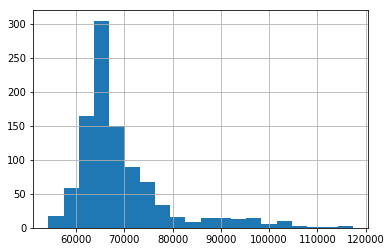

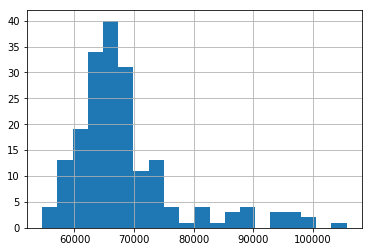

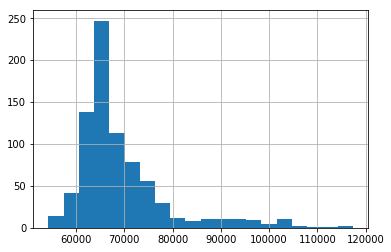

In [1902]:
conf_interval_hist('property_value', 0.005)

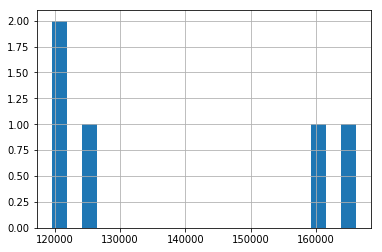

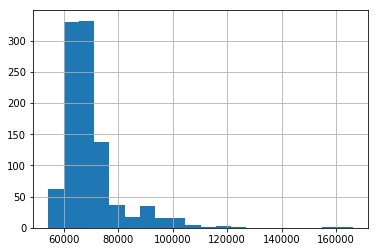

default_loan


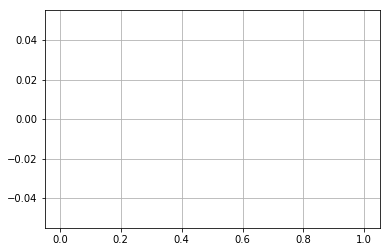

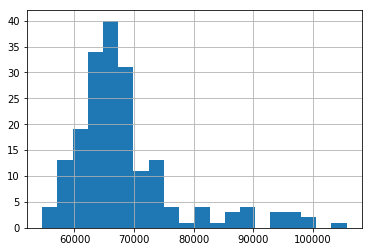

nondefault_loan


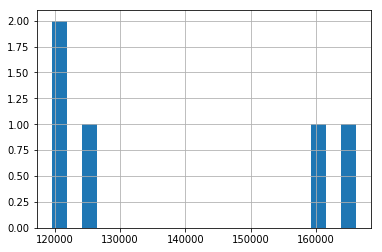

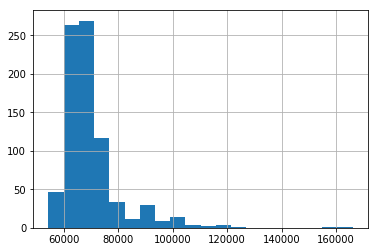

In [1903]:
hist_for_outliers('property_value', 0.005)

#### disbursed_loan_amount

(69190.39999999998, 28529.0)


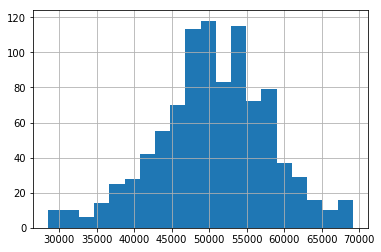

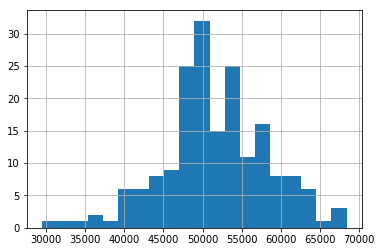

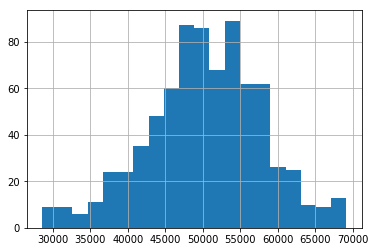

In [1904]:
conf_interval_hist('disbursed_loan_amount')

#### ltv

(89.86, 45.715999999999994)


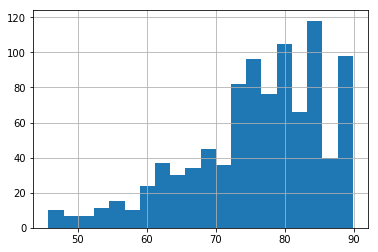

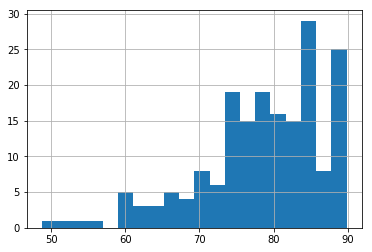

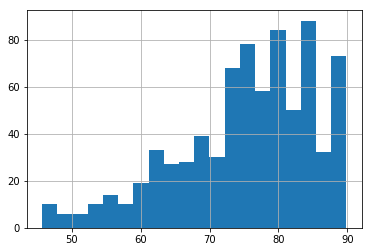

In [1905]:
conf_interval_hist('ltv')

#### Loan default

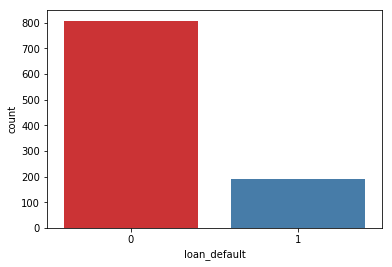

In [1906]:
_ = sns.countplot(loan_default['loan_default'].dropna(), palette='Set1')

#### Passport_flag

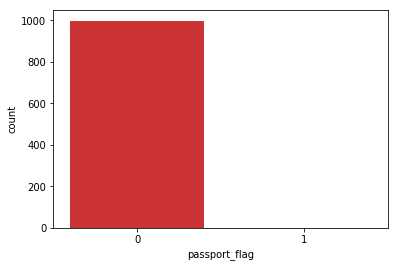

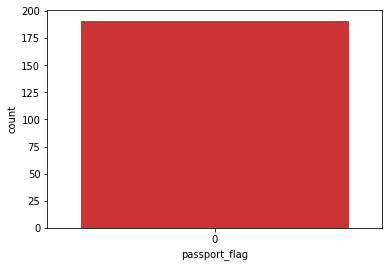

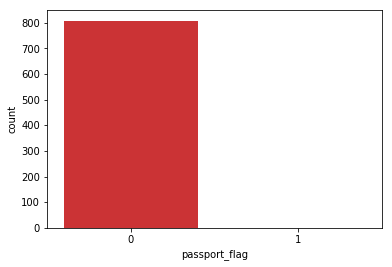

In [1907]:
plot_boolean('passport_flag')

In [1908]:
# function for plotting countplot for features having boolean values - 0 or 1

def plot_boolean(name):
  _ = sns.countplot(loan_default[name].dropna(), palette='Set1')
  plt.show()
  _ = sns.countplot(loan_default[default_mask][name].dropna(), palette='Set1')
  plt.show()
  _ = sns.countplot(loan_default[non_default_mask][name].dropna(), palette='Set1')
  plt.show()

#### Aadhar_flag

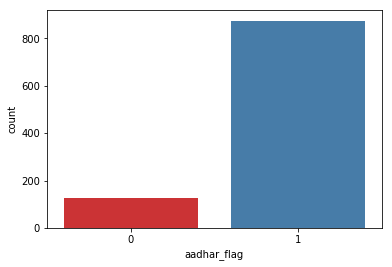

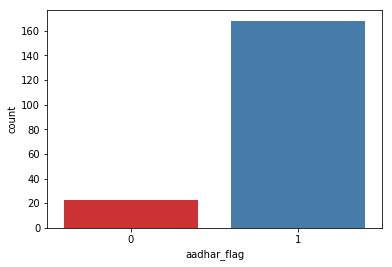

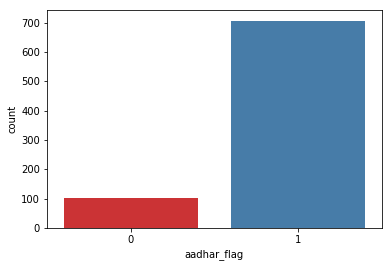

In [1909]:
plot_boolean('aadhar_flag')

#### current_pincode

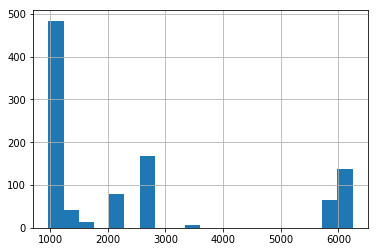

In [1910]:
# plotting histogram for numerical feature 'current_pincode'

_ = loan_default['current_pincode'].hist(bins=20,label='month')

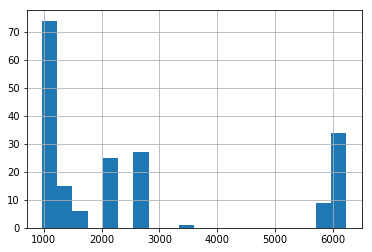

In [1911]:
# plotting histogram for numerical feature 'current_pincode' with 'loan_default' feature as 1

_ = loan_default[default_mask]['current_pincode'].hist(bins=20,label='month')

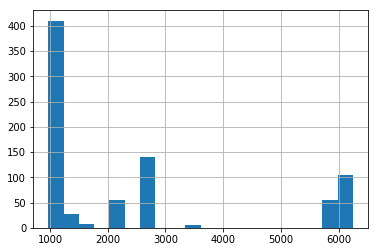

In [1912]:
# plotting histogram for numerical feature 'current_pincode' with 'loan_default' feature as 0

_ = loan_default[non_default_mask]['current_pincode'].hist(bins=20,label='month')

#### delinquent_accts_last_six_mths

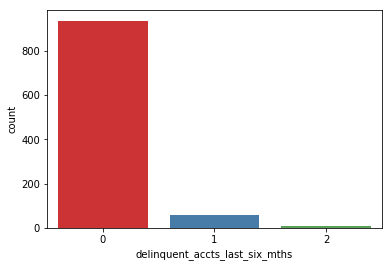

In [1913]:
# plotting countplot for categorical feature 'delinquent_accts_last_six_mths'

_ = sns.countplot(loan_default['delinquent_accts_last_six_mths'], palette='Set1')

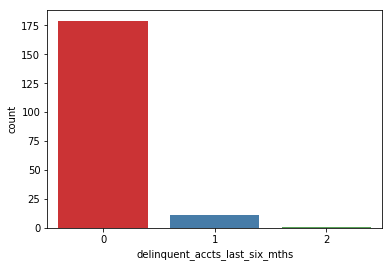

In [1914]:
# plotting countplot for categorical feature 'delinquent_accts_last_six_mths' with 'loan_default' feature as 1

_ = sns.countplot(loan_default[default_mask]['delinquent_accts_last_six_mths'], palette='Set1')

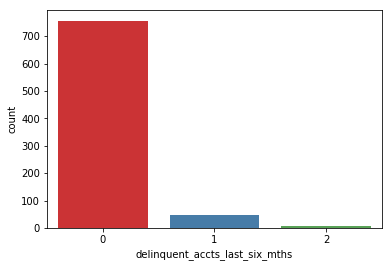

In [1915]:
# plotting countplot for categorical feature 'delinquent_accts_last_six_mths' with 'loan_default' feature as 0

_ = sns.countplot(loan_default[non_default_mask]['delinquent_accts_last_six_mths'], palette='Set1')

#### age

In [1916]:
# getting top rows for feature 'age'

loan_default['age'].head()

0    35.0
1    33.0
2    33.0
3    25.0
4    41.0
Name: age, dtype: float64

In [1917]:
# getting unique values for our 'age' feature/column

np.unique(loan_default['age'])

array([-50., -49., -48., -47., -46., -45., -44., -43., -42., -41., -40.,
       -39., -38., -37., -36.,  18.,  20.,  21.,  22.,  23.,  24.,  25.,
        26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,  34.,  35.,  36.,
        37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,  45.,  46.,  47.,
        48.,  49.,  50.])

#### employment_type

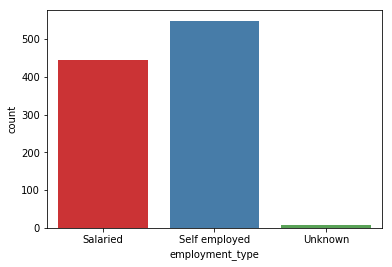

In [1918]:
# plotting countplot for categorical feature 'employment_type'

_ = sns.countplot(loan_default['employment_type'].fillna("No_data"), palette='Set1')

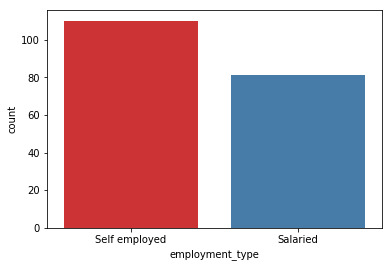

In [1919]:
# plotting countplot for categorical feature 'employment_type' with 'loan_default' feature as 1

_ = sns.countplot(loan_default[default_mask]['employment_type'].fillna("No_data"), palette='Set1')

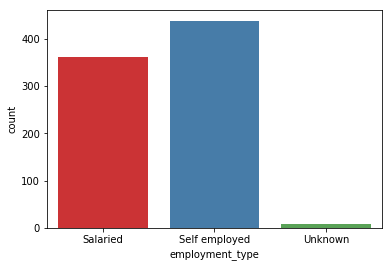

In [1920]:
# plotting countplot for categorical feature 'employment_type' with 'loan_default' feature as 0

_ = sns.countplot(loan_default[non_default_mask]['employment_type'].fillna("No_data"), palette='Set1')

#### mobile_flag

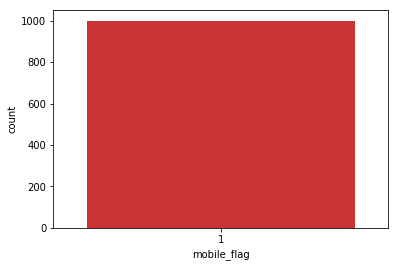

In [1921]:
# plotting countplot for feature 'mobile_flag' 

_ = sns.countplot(loan_default['mobile_flag'], palette='Set1')

#### new_accts_last_six_mths  

New loans taken by the customer in last 6 months before the disbursement

In [1922]:
# getting count of all possible values for 'new_accts_last_six_mths' feature

loan_default['new_accts_last_six_mths'].value_counts()

0     747
1     161
2      56
3      16
4      11
5       3
9       2
6       2
14      1
Name: new_accts_last_six_mths, dtype: int64

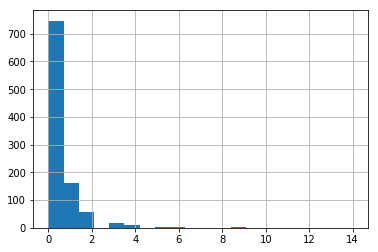

In [1923]:
# plotting histogram for numerical feature 'new_accts_last_six_mths'

_ = loan_default['new_accts_last_six_mths'].hist(bins=20,label='month')

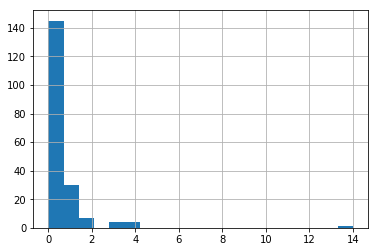

In [1924]:
# plotting histogram for numerical feature 'new_accts_last_six_mths' with 'loan_default' feature as 1

_ = loan_default[default_mask]['new_accts_last_six_mths'].hist(bins=20,label='month')

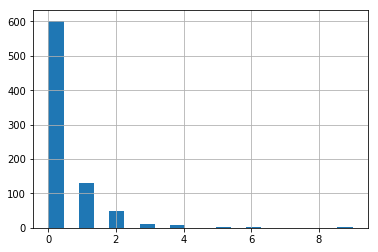

In [1925]:
# plotting histogram for numerical feature 'new_accts_last_six_mths' with 'loan_default' feature as 0

_ = loan_default[non_default_mask]['new_accts_last_six_mths'].hist(bins=20,label='month')

#### credit_inquiries

In [1926]:
# getting count of all possible values for 'credit_inquiries' feature

loan_default['credit_inquiries'].value_counts()

0     846
1     119
2      14
3       8
4       6
5       3
6       2
12      1
Name: credit_inquiries, dtype: int64

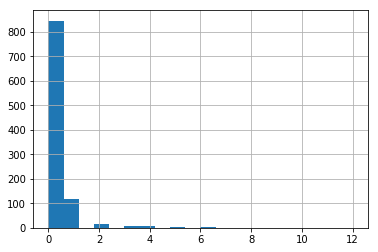

In [1927]:
# plotting histogram for numerical feature 'credit_inquiries'

_ = loan_default['credit_inquiries'].hist(bins=20,label='number')

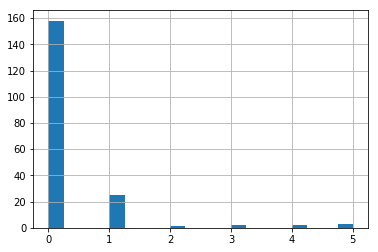

In [1928]:
# plotting histogram for numerical feature 'credit_inquiries' with 'loan_default' feature as 1

_ = loan_default[default_mask]['credit_inquiries'].hist(bins=20,label='number')

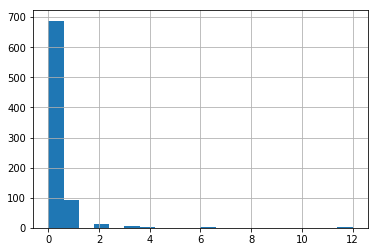

In [1929]:
# plotting histogram for numerical feature 'credit_inquiries' with 'loan_default' feature as 0

_ = loan_default[non_default_mask]['credit_inquiries'].hist(bins=20,label='number')

#### PAN_flag

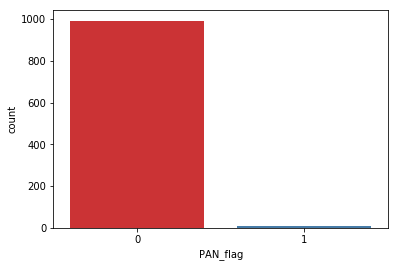

In [1930]:
# plotting countplot for categorical feature 'PAN_flag'

_ = sns.countplot(loan_default['PAN_flag'], palette='Set1')

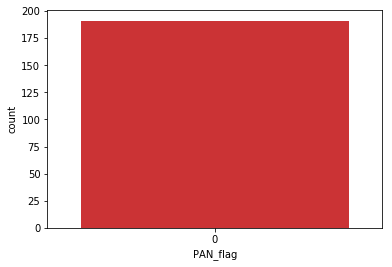

In [1931]:
# plotting countplot for categorical feature 'PAN_flag' with 'loan_default' feature as 1

_ = sns.countplot(loan_default[default_mask]['PAN_flag'], palette='Set1')

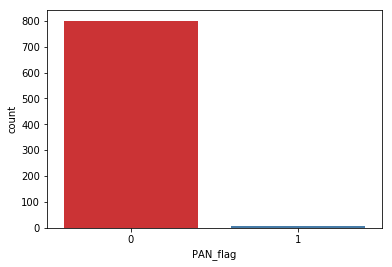

In [1932]:
# plotting countplot for categorical feature 'PAN_flag' with 'loan_default' feature as 0

_ = sns.countplot(loan_default[non_default_mask]['PAN_flag'], palette='Set1')

#### Credit_score

Bureau Score

In [1933]:
# getting count of all possible values for 'credit_score' feature

loan_default['credit_score'].value_counts()

0      420
825     57
738     43
300     32
17      21
763     18
15      18
708     14
749     11
16      10
710      9
18       9
783      8
792      7
836      7
615      6
709      6
623      5
680      5
681      5
653      4
657      4
671      4
684      4
597      4
832      4
753      4
733      3
585      3
655      3
737      3
739      3
743      3
719      3
717      3
593      3
707      3
676      3
14       3
700      3
687      3
607      3
692      3
774      3
599      3
819      3
626      3
627      3
635      3
758      3
830      3
688      3
785      3
762      3
796      3
768      3
548      2
596      2
620      2
602      2
610      2
519      2
686      2
603      2
573      2
625      2
575      2
628      2
661      2
583      2
630      2
656      2
601      2
651      2
600      2
650      2
824      2
606      2
741      2
793      2
362      2
728      2
734      2
726      2
429      2
771      2
772      2
839      2
786      2
706      2
797      2

In [1934]:
# defining a mask where credit_score is greater than 0 
mask = loan_default['credit_score'] > 0

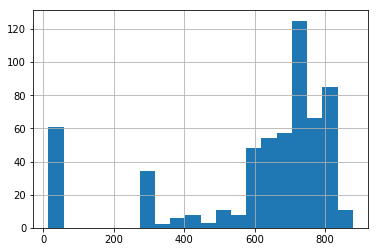

In [1935]:
# plotting histogram for numerical feature 'credit_score' with 'credit_score' feature > 0

_ = loan_default[mask]['credit_score'].hist(bins=20,label='number')

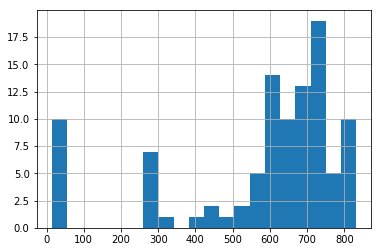

In [1936]:
# plotting histogram for numerical feature 'credit_score' with 'credit_score' feature > 0 and 'loan_default' 
# feature as 1

_ = loan_default[default_mask&mask]['credit_score'].hist(bins=20,label='number')

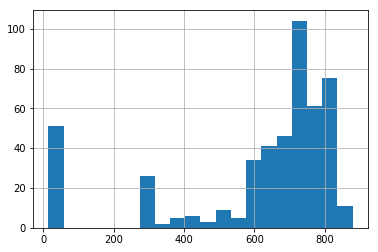

In [1937]:
# plotting histogram for numerical feature 'credit_score' with 'credit_score' feature > 0 and 'loan_default' 
# feature as 0

_ = loan_default[non_default_mask&mask]['credit_score'].hist(bins=20,label='score')

#### monthly_installment

EMI Amount of the primary loan

(35333.299999999945, 0.0)


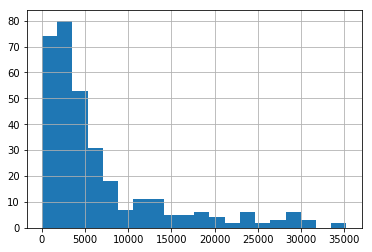

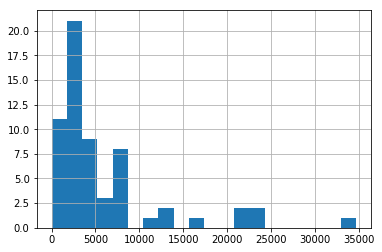

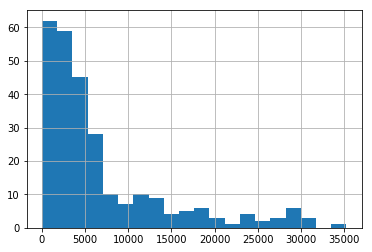

In [1938]:
conf_interval_hist('monthly_installment')

#### sec_monthly_installment 

(1332.3299999999979, 0.0)


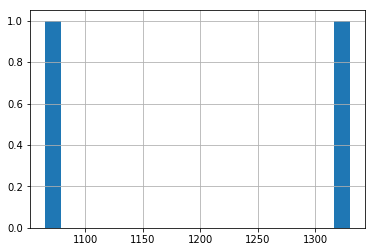

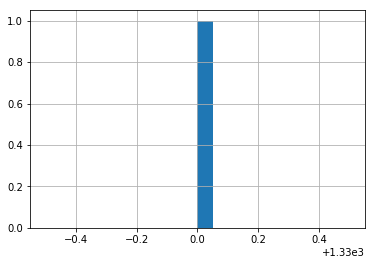

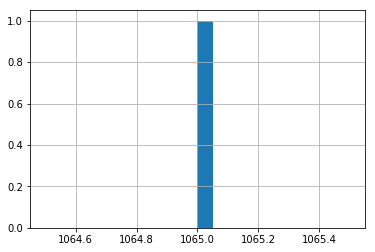

In [1939]:
conf_interval_hist('sec_monthly_installment', 0.005)

### Data Preprocessing



In [1940]:
# removing string yrs & mon from 'average_acct_age' column and converting final value into months

loan_default['average_acct_age'] = loan_default['average_loan_tenure'].str.split(' ')
loan_default['tenure_year'] = loan_default['average_acct_age'].apply(lambda x: x[0])
loan_default['tenure_month']= loan_default['average_acct_age'].apply(lambda x : x[1] if len(x) > 1 else x[0])
loan_default.head()

customer_id  disbursed_loan_amount  property_value    ltv  current_pincode date_of_birth employment_type  employee_id  mobile_flag  aadhar_flag  PAN_flag  passport_flag  credit_score            credit_score_desc  total_no_accts  active_no_accts  total_default_accts  active_curr_balance  total_sanctioned_amt  total_disbursed_amt  sec_total_no_accts  sec_active_no_accts  sec_total_default_accts  sec_active_curr_balance  sec_total_sanctioned_amt  sec_total_disbursed_amt  monthly_installment  sec_monthly_installment  new_accts_last_six_mths  delinquent_accts_last_six_mths average_loan_tenure credit_history_length  credit_inquiries  loan_default Date_of_birth Disbursal_Date   age age_segment average_acct_age tenure_year tenure_month
0       420825                  50578           58400  89.55             1441      01-01-84        Salaried         1998            1            1         0              0             0  No Bureau History Available               0                0                    0                    0                     0                    0                   0                    0                        0                        0                         0                        0                    0                        0                        0                               0           0yrs 0mon             0yrs 0mon                 0             0    1984-01-01     2018-03-08  35.0      Junior     [0yrs, 0mon]        0yrs         0mon
1       537409                  47145           65550  73.23             1502      31-07-85   Self employed         1998            1            1         0              0           598                I-Medium Risk               1                1                    1                27600                 50200                50200                   0                    0                        0                        0                         0                        0                 1991                        0                        0                               1          1yrs 11mon            1yrs 11mon                 0             1    1985-07-31     2018-09-26  33.0      Junior    [1yrs, 11mon]        1yrs        11mon
2       417566                  53278           61360  89.63             1497      24-08-85   Self employed         1998            1            1         0              0             0  No Bureau History Available               0                0                    0                    0                     0                    0                   0                    0                        0                        0                         0                        0                    0                        0                        0                               0           0yrs 0mon             0yrs 0mon                 0             0    1985-08-24     2018-01-08  33.0      Junior     [0yrs, 0mon]        0yrs         0mon
3       624493                  57513           66113  88.48             1501      30-12-93   Self employed         1998            1            1         0              0           305             L-Very High Risk               3                0                    0                    0                     0                    0                   0                    0                        0                        0                         0                        0                   31                        0                        0                               0           0yrs 8mon             1yrs 3mon                 1             1    1993-12-30     2018-10-26  25.0      Junior     [0yrs, 8mon]        0yrs         8mon
4       539055                  52378           60300  88.39             1495      09-12-77   Self employed         1998            1            1         0              0             0  No Bureau History Available               0                0                    0                    0         

In [1941]:
# changing loan tenure feature in months from loan tenure in years and months

loan_default['tenure_year'] = loan_default['tenure_year'].astype(str).map(lambda x: x.replace('yrs','')).astype(int)
loan_default['tenure_month'] = loan_default['tenure_month'].astype(str).map(lambda x: x.replace('mon','')).astype(int)
loan_default['tenure_in_months'] = loan_default['tenure_year'] * 12 + loan_default['tenure_month']

#### average_acct_age_mth

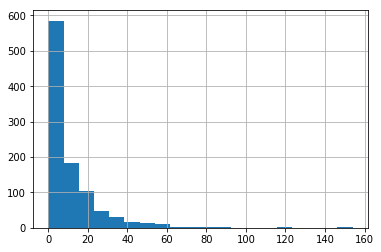

In [1942]:
# plotting histogram for numerical feature 'tenure_in_months'

_ = loan_default['tenure_in_months'].hist(bins=20,label='month')

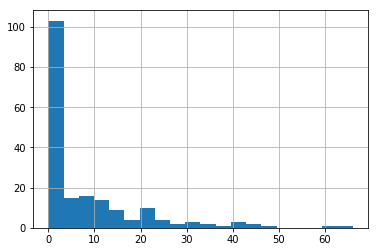

In [1943]:
# plotting histogram for numerical feature 'tenure_in_months' with 'loan_default' feature as 1

_ = loan_default[default_mask]['tenure_in_months'].hist(bins=20,label='month')

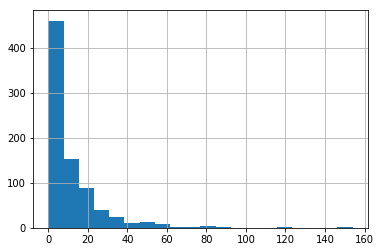

In [1944]:
# plotting histogram for numerical feature 'tenure_in_months' with 'loan_default' feature as 0

_ = loan_default[non_default_mask]['tenure_in_months'].hist(bins=20,label='month')

In [1945]:
# Dropping columns/features which are no longer required

loan_default = loan_default.drop(['average_acct_age','tenure_year','tenure_month'],axis = 1)

In [1946]:
# removing string yrs & mon from credit_history_length column and converting final value into months

loan_default['credit_duration'] = loan_default['credit_history_length'].astype(str).map(lambda x: x.replace('yrs',''))
loan_default['credit_duration'] = loan_default['credit_duration'].astype(str).map(lambda x: x.replace('mon',''))

In [1947]:
# getting year value and month value from credit_duration feature and storing in seperate columns
 
loan_default['credit_duration'] = loan_default['credit_duration'].str.split(' ')
loan_default['credit_duration_yrs'] = loan_default['credit_duration'].apply(lambda x: x[0])
loan_default['credit_duration_month'] = loan_default['credit_duration'].apply(lambda x : x[1] if len(x) > 1 else x[0])
loan_default.head()

customer_id  disbursed_loan_amount  property_value    ltv  current_pincode date_of_birth employment_type  employee_id  mobile_flag  aadhar_flag  PAN_flag  passport_flag  credit_score            credit_score_desc  total_no_accts  active_no_accts  total_default_accts  active_curr_balance  total_sanctioned_amt  total_disbursed_amt  sec_total_no_accts  sec_active_no_accts  sec_total_default_accts  sec_active_curr_balance  sec_total_sanctioned_amt  sec_total_disbursed_amt  monthly_installment  sec_monthly_installment  new_accts_last_six_mths  delinquent_accts_last_six_mths average_loan_tenure credit_history_length  credit_inquiries  loan_default Date_of_birth Disbursal_Date   age age_segment  tenure_in_months credit_duration credit_duration_yrs credit_duration_month
0       420825                  50578           58400  89.55             1441      01-01-84        Salaried         1998            1            1         0              0             0  No Bureau History Available               0                0                    0                    0                     0                    0                   0                    0                        0                        0                         0                        0                    0                        0                        0                               0           0yrs 0mon             0yrs 0mon                 0             0    1984-01-01     2018-03-08  35.0      Junior                 0          [0, 0]                   0                     0
1       537409                  47145           65550  73.23             1502      31-07-85   Self employed         1998            1            1         0              0           598                I-Medium Risk               1                1                    1                27600                 50200                50200                   0                    0                        0                        0                         0                        0                 1991                        0                        0                               1          1yrs 11mon            1yrs 11mon                 0             1    1985-07-31     2018-09-26  33.0      Junior                23         [1, 11]                   1                    11
2       417566                  53278           61360  89.63             1497      24-08-85   Self employed         1998            1            1         0              0             0  No Bureau History Available               0                0                    0                    0                     0                    0                   0                    0                        0                        0                         0                        0                    0                        0                        0                               0           0yrs 0mon             0yrs 0mon                 0             0    1985-08-24     2018-01-08  33.0      Junior                 0          [0, 0]                   0                     0
3       624493                  57513           66113  88.48             1501      30-12-93   Self employed         1998            1            1         0              0           305             L-Very High Risk               3                0                    0                    0                     0                    0                   0                    0                        0                        0                         0                        0                   31                        0                        0                               0           0yrs 8mon             1yrs 3mon                 1             1    1993-12-30     2018-10-26  25.0      Junior                 8          [1, 3]                   1                     3
4       539055                  52378           60300  88.39             1495      09-12-77   Self employed         1998        

In [1948]:
# creating a new feature 'credit_duration_in_months' from existing features to get credit history in months

loan_default['credit_duration_in_months'] = loan_default['credit_duration_yrs'].astype(int) * 12 + loan_default['credit_duration_month'].astype(int)

#### credit_history_length

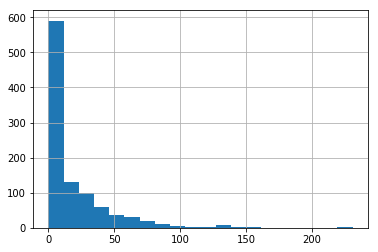

In [1949]:
# plotting histogram for numerical feature 'credit_duration_in_months'

_ = loan_default['credit_duration_in_months'].hist(bins=20,label='month')

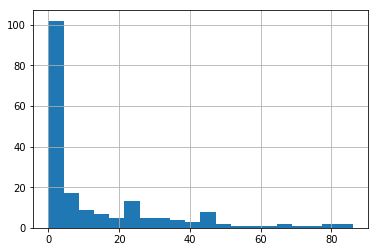

In [1950]:
# plotting histogram for numerical feature 'credit_duration_in_months' with 'loan_default' feature as 1

_ = loan_default[default_mask]['credit_duration_in_months'].hist(bins=20,label='month')

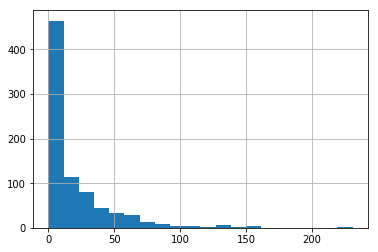

In [1951]:
# plotting histogram for numerical feature 'credit_duration_in_months' with 'loan_default' feature as 0

_ = loan_default[non_default_mask]['credit_duration_in_months'].hist(bins=20,label='month')

In [1952]:
# Dropping credit history features from dataframe and updating dataframe

loan_default = loan_default.drop(['credit_history_length','credit_duration','credit_duration_yrs','credit_duration_month'],axis = 1)

In [1953]:
# Dropping old date columns

loan_default = loan_default.drop(['Date_of_birth','Disbursal_Date'],axis = 1)

In [1954]:
loan_default.head()

customer_id  disbursed_loan_amount  property_value    ltv  current_pincode date_of_birth employment_type  employee_id  mobile_flag  aadhar_flag  PAN_flag  passport_flag  credit_score            credit_score_desc  total_no_accts  active_no_accts  total_default_accts  active_curr_balance  total_sanctioned_amt  total_disbursed_amt  sec_total_no_accts  sec_active_no_accts  sec_total_default_accts  sec_active_curr_balance  sec_total_sanctioned_amt  sec_total_disbursed_amt  monthly_installment  sec_monthly_installment  new_accts_last_six_mths  delinquent_accts_last_six_mths average_loan_tenure  credit_inquiries  loan_default   age age_segment  tenure_in_months  credit_duration_in_months
0       420825                  50578           58400  89.55             1441      01-01-84        Salaried         1998            1            1         0              0             0  No Bureau History Available               0                0                    0                    0                     0                    0                   0                    0                        0                        0                         0                        0                    0                        0                        0                               0           0yrs 0mon                 0             0  35.0      Junior                 0                          0
1       537409                  47145           65550  73.23             1502      31-07-85   Self employed         1998            1            1         0              0           598                I-Medium Risk               1                1                    1                27600                 50200                50200                   0                    0                        0                        0                         0                        0                 1991                        0                        0                               1          1yrs 11mon                 0             1  33.0      Junior                23                         23
2       417566                  53278           61360  89.63             1497      24-08-85   Self employed         1998            1            1         0              0             0  No Bureau History Available               0                0                    0                    0                     0                    0                   0                    0                        0                        0                         0                        0                    0                        0                        0                               0           0yrs 0mon                 0             0  33.0      Junior                 0                          0
3       624493                  57513           66113  88.48             1501      30-12-93   Self employed         1998            1            1         0              0           305             L-Very High Risk               3                0                    0                    0                     0                    0                   0                    0                        0                        0                         0                        0                   31                        0                        0                               0           0yrs 8mon                 1             1  25.0      Junior                 8                         15
4       539055                  52378           60300  88.39             1495      09-12-77   Self employed         1998            1            1         0              0             0  No Bureau History Available               0                0                    0                    0                     0                    0                   0                    0                        0                        0                         0                        0                    0                        0                  

### Data Preparation

#### Dummy Variable creation

In [1955]:
# Creating a dummy variable for the categorical variables and dropping the first one 
# (Converting Nominal Variables to Numeric Variables)

# converting employment_type as employment_type_salaried and employment_type_Self employed and employment_type_Unknown 

dummy = pd.get_dummies(loan_default[['employment_type', 'credit_score_desc', 'age_segment']], drop_first=False)

# Adding the results to the main dataframe i.e. loan_default

loan_default = pd.concat([loan_default, dummy], axis=1)

In [1956]:
# getting shape of dataframe 

loan_default.shape

(999, 62)

In [1957]:
loan_default.head()

customer_id  disbursed_loan_amount  property_value    ltv  current_pincode date_of_birth employment_type  employee_id  mobile_flag  aadhar_flag  PAN_flag  passport_flag  credit_score            credit_score_desc  total_no_accts  active_no_accts  total_default_accts  active_curr_balance  total_sanctioned_amt  total_disbursed_amt  sec_total_no_accts  sec_active_no_accts  sec_total_default_accts  sec_active_curr_balance  sec_total_sanctioned_amt  sec_total_disbursed_amt  monthly_installment  sec_monthly_installment  new_accts_last_six_mths  delinquent_accts_last_six_mths average_loan_tenure  credit_inquiries  loan_default   age age_segment  tenure_in_months  credit_duration_in_months  employment_type_Salaried  employment_type_Self employed  employment_type_Unknown  credit_score_desc_A-Very Low Risk  credit_score_desc_B-Very Low Risk  credit_score_desc_C-Very Low Risk  credit_score_desc_D-Very Low Risk  credit_score_desc_E-Low Risk  credit_score_desc_F-Low Risk  \
0       420825                  50578           58400  89.55             1441      01-01-84        Salaried         1998            1            1         0              0             0  No Bureau History Available               0                0                    0                    0                     0                    0                   0                    0                        0                        0                         0                        0                    0                        0                        0                               0           0yrs 0mon                 0             0  35.0      Junior                 0                          0                         1                              0                        0                                  0                                  0                                  0                                  0                             0                             0   
1       537409                  47145           65550  73.23             1502      31-07-85   Self employed         1998            1            1         0              0           598                I-Medium Risk               1                1                    1                27600                 50200                50200                   0                    0                        0                        0                         0                        0                 1991                        0                        0                               1          1yrs 11mon                 0             1  33.0      Junior                23                         23                         0                              1                        0                                  0                                  0                                  0                                  0                             0                             0   
2       417566                  53278           61360  89.63             1497      24-08-85   Self employed         1998            1            1         0              0             0  No Bureau History Available               0                0                    0                    0                     0                    0                   0                    0                        0                        0                         0                        0                    0                        0                        0                               0           0yrs 0mon                 0             0  33.0      Junior                 0                          0                         0                              1                        0                                  0                                  0                                  0                                  0                             0                             0   
3       624493                  57513           66113  88.48             1501      30-12-93

In [1958]:
# dropping those features which are no longer required from dataframe

loan_default = loan_default.drop(['employment_type', 'credit_score_desc', 'age_segment'],axis = 1)

In [1959]:
loan_default.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999 entries, 0 to 998
Data columns (total 59 columns):
customer_id                                                                  999 non-null int64
disbursed_loan_amount                                                        999 non-null int64
property_value                                                               999 non-null int64
ltv                                                                          999 non-null float64
current_pincode                                                              999 non-null int64
date_of_birth                                                                999 non-null object
employee_id                                                                  999 non-null int64
mobile_flag                                                                  999 non-null int64
aadhar_flag                                                                  999 non-null int64
PAN_flag                    

### Outlier treatment

In [1960]:
# statistical analysis of our dataset

loan_default.describe()

customer_id  disbursed_loan_amount  property_value         ltv  current_pincode  employee_id  mobile_flag  aadhar_flag    PAN_flag  passport_flag  credit_score  total_no_accts  active_no_accts  total_default_accts  active_curr_balance  total_sanctioned_amt  total_disbursed_amt  sec_total_no_accts  sec_active_no_accts  sec_total_default_accts  sec_active_curr_balance  sec_total_sanctioned_amt  sec_total_disbursed_amt  monthly_installment  sec_monthly_installment  new_accts_last_six_mths  delinquent_accts_last_six_mths  credit_inquiries  loan_default         age  tenure_in_months  credit_duration_in_months  employment_type_Salaried  employment_type_Self employed  employment_type_Unknown  credit_score_desc_A-Very Low Risk  credit_score_desc_B-Very Low Risk  credit_score_desc_C-Very Low Risk  credit_score_desc_D-Very Low Risk  credit_score_desc_E-Low Risk  credit_score_desc_F-Low Risk  credit_score_desc_G-Low Risk  credit_score_desc_H-Medium Risk  \
count     999.000000             999.000000      999.000000  999.000000       999.000000   999.000000        999.0   999.000000  999.000000     999.000000    999.000000      999.000000       999.000000           999.000000         9.990000e+02          9.990000e+02         9.990000e+02          999.000000           999.000000               999.000000             9.990000e+02              9.990000e+02             9.990000e+02           999.000000               999.000000               999.000000                      999.000000        999.000000    999.000000  999.000000        999.000000                 999.000000                999.000000                     999.000000               999.000000                         999.000000                         999.000000                         999.000000                         999.000000                    999.000000                    999.000000                    999.000000                       999.000000   
mean   536588.883884           50509.937938    69409.281281   75.414825      2449.928929  1165.298298          1.0     0.874875    0.008008       0.001001    352.989990        2.520521         1.097097             0.139139         1.657903e+05          2.098051e+05         2.075338e+05            0.035035             0.015015                 0.003003             7.357093e+03              8.882135e+03             8.887259e+03          5802.395395                27.409409                 0.424424                        0.071071          0.234234      0.191191   25.195195         10.043043                  17.449449                  0.443443                       0.548549                 0.008008                           0.086086                           0.064064                           0.079079                           0.058058                      0.038038                      0.040040                      0.014014                         0.043043   
std     67982.973757            9534.495623    10824.684071   11.682910      1938.722983   683.826903          0.0     0.331026    0.089173       0.031639    352.882093        4.606275         1.763463             0.601984         7.956767e+05          9.052672e+05         9.029737e+05            0.402614             0.163794                 0.054745             1.871160e+05              2.105793e+05             2.105870e+05         33638.174206               409.290074                 1.015927                        0.283044          0.761807      0.393436   26.236762         15.289430                  26.560197                  0.497040                       0.497887                 0.089173                           0.280632                           0.244990                           0.269997                           0.233970                      0.191384                      0.196151                      0.117607                         0.203056   
min    417430.000000           13990.000000    39605.000000   18.570000       971.000000    83.000000          1.0     0.000000    0.

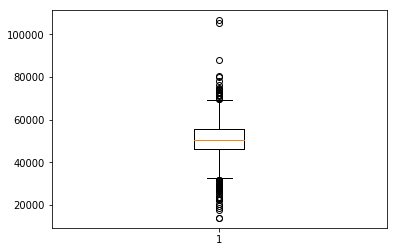

In [1961]:
# Boxplot to visualize the values for 'disbursed_loan_amount' feature

plt.boxplot(loan_default['disbursed_loan_amount'])
Q1 = loan_default['disbursed_loan_amount'].quantile(0.25)
Q3 = loan_default['disbursed_loan_amount'].quantile(0.95)
IQR = Q3 - Q1
loan_default = loan_default[(loan_default['disbursed_loan_amount'] >= Q1 - 1.5*IQR) & (loan_default['disbursed_loan_amount'] <= Q3 + 1.5*IQR)]

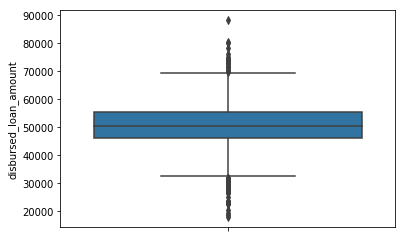

In [1962]:
# Boxplot to visualize the outlier values for 'disbursed_loan_amount' feature

sns.boxplot(y=loan_default['disbursed_loan_amount'])

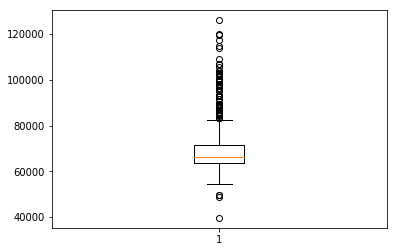

In [1963]:
# Boxplot to visualize the values for 'property_value' feature

plt.boxplot(loan_default['property_value'])

Q1 = loan_default['property_value'].quantile(0.25)
Q3 = loan_default['property_value'].quantile(0.95)
IQR = Q3 - Q1
loan_default = loan_default[(loan_default['property_value'] >= Q1 - 1.5*IQR) & (loan_default['property_value'] <= Q3 + 1.5*IQR)]

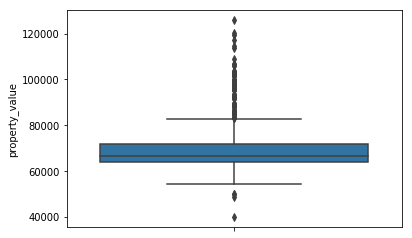

In [1964]:
# Boxplot to visualize the outlier values for 'property_value' feature

sns.boxplot(y=loan_default['property_value'])

In [1965]:
# Clipping the values by specifying minimum and maximum defined values for ltv (Outlier Treatment)

loan_default['ltv'] = np.clip(loan_default['ltv'], a_min=40, a_max = 100)

In [1966]:
# Clipping the values by specifying minimum and maximum defined values for all features (Outlier Treatment)

loan_default['credit_score'] = np.clip(loan_default['credit_score'], a_min=300, a_max = 900)

loan_default['total_no_accts'] = np.clip(loan_default['total_no_accts'], a_min=0, a_max = 10)
loan_default['active_no_accts'] = np.clip(loan_default['active_no_accts'], a_min=0, a_max = 10)
loan_default['total_default_accts'] = np.clip(loan_default['total_default_accts'], a_min=0, a_max = 5)

loan_default['active_curr_balance'] = np.clip(loan_default['active_curr_balance'], a_min=0, a_max = 500000)
loan_default['total_sanctioned_amt'] = np.clip(loan_default['total_sanctioned_amt'], a_min=0, a_max = 500000)
loan_default['total_disbursed_amt'] = np.clip(loan_default['total_disbursed_amt'], a_min=0, a_max = 500000)

loan_default['sec_total_no_accts'] = np.clip(loan_default['sec_total_no_accts'], a_min=0, a_max = 5)
loan_default['sec_active_no_accts'] = np.clip(loan_default['sec_active_no_accts'], a_min=0, a_max = 3)
loan_default['sec_total_default_accts'] = np.clip(loan_default['sec_total_default_accts'], a_min=0, a_max = 1)

loan_default['sec_active_curr_balance'] = np.clip(loan_default['sec_active_curr_balance'], a_min=0, a_max = 100000)
loan_default['sec_total_sanctioned_amt'] = np.clip(loan_default['sec_total_sanctioned_amt'], a_min=0, a_max = 100000)
loan_default['sec_total_disbursed_amt'] = np.clip(loan_default['sec_total_disbursed_amt'], a_min=0, a_max = 100000)

loan_default['monthly_installment'] = np.clip(loan_default['monthly_installment'], a_min=0, a_max = 10000)
loan_default['sec_monthly_installment'] = np.clip(loan_default['sec_monthly_installment'], a_min=0, a_max = 2000)

loan_default['new_accts_last_six_mths'] = np.clip(loan_default['new_accts_last_six_mths'], a_min=0, a_max = 4)
loan_default['delinquent_accts_last_six_mths'] = np.clip(loan_default['delinquent_accts_last_six_mths'], a_min=0, a_max = 2)

#loan_default['average_loan_tenure'] = np.clip(loan_default['average_loan_tenure'], a_min=0, a_max = 48)
loan_default['credit_duration_in_months'] = np.clip(loan_default['credit_duration_in_months'], a_min=0, a_max = 120)
loan_default['credit_inquiries'] = np.clip(loan_default['credit_inquiries'], a_min=0, a_max = 4)


### Splitting Data into Training and Test Sets

Splitting the data into training and test sets (70-30 %)

In [1967]:
#Test train split

from sklearn.model_selection import train_test_split

In [1968]:
# Putting feature variable to X

X = loan_default.drop(['loan_default'],axis=1)

# Putting response variable to y

y = loan_default['loan_default']


In [1969]:
# Splitting the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Feature Scaling

Feature scaling is the method to limit the range of variables so
that they can be compared on common grounds. It is performed on continuous
variables. Normalization is the most common process in feature scaling which
involves rescaling features (continuous) in the range of 0 to 1.

In [1970]:
# checking column values

X_train.columns

Index([u'customer_id', u'disbursed_loan_amount', u'property_value', u'ltv', u'current_pincode', u'date_of_birth', u'employee_id', u'mobile_flag', u'aadhar_flag', u'PAN_flag', u'passport_flag', u'credit_score', u'total_no_accts', u'active_no_accts', u'total_default_accts', u'active_curr_balance', u'total_sanctioned_amt', u'total_disbursed_amt', u'sec_total_no_accts', u'sec_active_no_accts', u'sec_total_default_accts', u'sec_active_curr_balance', u'sec_total_sanctioned_amt', u'sec_total_disbursed_amt', u'monthly_installment', u'sec_monthly_installment', u'new_accts_last_six_mths', u'delinquent_accts_last_six_mths', u'average_loan_tenure', u'credit_inquiries', u'age', u'tenure_in_months', u'credit_duration_in_months', u'employment_type_Salaried', u'employment_type_Self employed', u'employment_type_Unknown', u'credit_score_desc_A-Very Low Risk', u'credit_score_desc_B-Very Low Risk', u'credit_score_desc_C-Very Low Risk', u'credit_score_desc_D-Very Low Risk',
       u'credit_score_desc_E-Low

In [1971]:
# Feature Scaling - normalising our data for these features

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[['disbursed_loan_amount', 'property_value','ltv','current_pincode', 'employee_id',
'credit_score', 'total_no_accts','active_no_accts', 'total_default_accts', 
'active_curr_balance','total_sanctioned_amt', 'total_disbursed_amt', 'sec_total_no_accts',
'sec_active_no_accts', 'sec_total_default_accts', 'sec_active_curr_balance',
'sec_total_sanctioned_amt', 'sec_total_disbursed_amt', 'monthly_installment',
'sec_monthly_installment', 'new_accts_last_six_mths',
'sec_monthly_installment', 'new_accts_last_six_mths',
'delinquent_accts_last_six_mths', 'credit_inquiries',
'tenure_in_months', 'credit_duration_in_months',
'employment_type_Self employed', 'employment_type_Unknown']] = scaler.fit_transform(X_train[['disbursed_loan_amount', 'property_value','ltv','current_pincode', 'employee_id',
'credit_score', 'total_no_accts','active_no_accts', 'total_default_accts', 
'active_curr_balance','total_sanctioned_amt', 'total_disbursed_amt', 'sec_total_no_accts',
'sec_active_no_accts', 'sec_total_default_accts', 'sec_active_curr_balance',
'sec_total_sanctioned_amt', 'sec_total_disbursed_amt', 'monthly_installment',
'sec_monthly_installment', 'new_accts_last_six_mths',
'sec_monthly_installment', 'new_accts_last_six_mths',
'delinquent_accts_last_six_mths', 'credit_inquiries',
'tenure_in_months', 'credit_duration_in_months',
'employment_type_Self employed', 'employment_type_Unknown',]])

X_train.head()

customer_id  disbursed_loan_amount  property_value       ltv  current_pincode date_of_birth  employee_id  mobile_flag  aadhar_flag  PAN_flag  passport_flag  credit_score  total_no_accts  active_no_accts  total_default_accts  active_curr_balance  total_sanctioned_amt  total_disbursed_amt  sec_total_no_accts  sec_active_no_accts  sec_total_default_accts  sec_active_curr_balance  sec_total_sanctioned_amt  sec_total_disbursed_amt  monthly_installment  sec_monthly_installment  new_accts_last_six_mths  delinquent_accts_last_six_mths average_loan_tenure  credit_inquiries   age  tenure_in_months  credit_duration_in_months  employment_type_Salaried  employment_type_Self employed  employment_type_Unknown  credit_score_desc_A-Very Low Risk  credit_score_desc_B-Very Low Risk  credit_score_desc_C-Very Low Risk  credit_score_desc_D-Very Low Risk  credit_score_desc_E-Low Risk  credit_score_desc_F-Low Risk  credit_score_desc_G-Low Risk  credit_score_desc_H-Medium Risk  \
218       515846              -0.681024       -1.163542  0.231793        -0.744162      02-01-97     1.046641            1            1         0              0     -0.909253       -0.714764        -0.612779            -0.308497            -0.473706             -0.538952            -0.537061           -0.106024            -0.087271                -0.065795                -0.061601                 -0.079942                -0.083277            -0.580355                -0.091003                -0.458426                       -0.260045           0yrs 0mon          1.092094  22.0         -0.676804                  -0.687527                         0                       0.890963                -0.100795                                  0                                  0                                  0                                  0                             0                             0                             0                                0   
360       527301              -0.058521       -0.087982 -0.110963        -0.646604      26-10-89     0.620101            1            0         0              0     -0.909253       -0.714764        -0.612779            -0.308497            -0.473706             -0.538952            -0.537061           -0.106024            -0.087271                -0.065795                -0.061601                 -0.079942                -0.083277            -0.580355                -0.091003                -0.458426                       -0.260045           0yrs 0mon         -0.366826  29.0         -0.676804                  -0.687527                         1                      -1.122382                -0.100795                                  0                                  0                                  0                                  0                             0                             0                             0                                0   
543       613856              -1.053387        0.107148 -1.497242        -0.784726      01-03-84    -0.407671            1            1         0              0      1.013660       -0.036079        -0.053075            -0.308497            -0.339548             -0.414922            -0.412604           -0.106024            -0.087271                -0.065795                -0.061601                 -0.079942                -0.083277             0.615175                -0.091003                 0.773483                       -0.260045           0yrs 3mon          1.092094  35.0         -0.468740                  -0.400596                         1                      -1.122382                -0.100795                                  0                                  0                                  0                                  1                             0                             0                             0                                0   
111       426914              -0.530436       -0.982489  0.466877        -0.212215      01-01-67     0.73

### Feature Engineering

Creating new features from existing features in order to improve the performance of model

In [1972]:
# loan and disbursed amount based features

#loan_default['dtv'] = round(100*loan_default['disbursed_loan_amount']/loan_default['property_value'],2)
#loan_default['diff_ltv_dtv'] = loan_default['ltv'] - loan_default['dtv']

loan_default['loan_amt'] = loan_default['ltv'] * loan_default['property_value']

loan_default['high_loan_flag'] = np.where(loan_default['loan_amt'] > loan_default['disbursed_loan_amount'], 1, 0)

loan_default.drop('loan_amt',axis=1, inplace=True) # dropping due to high correlation with disbursed amt

In [1973]:
# Creating some flags based on account activity

loan_default['recent_bad_accnt_flag'] = np.where(loan_default['delinquent_accts_last_six_mths'] > 0, 1, 0)

loan_default['recent_open_accnt_flag'] = np.where(loan_default['new_accts_last_six_mths'] > 0, 1, 0)

loan_default['inquire_flag'] = np.where(loan_default['credit_inquiries'] > 0, 1, 0)

loan_default['id_score'] = (loan_default['aadhar_flag'] + loan_default['PAN_flag'] + loan_default['passport_flag'])

In [1974]:
# function to group values according to column name and aggregate the values by computing their respective mean 

def mean_encode(target, column_name, dataframe, name):
    df = dataframe[target].groupby(dataframe[column_name]).agg({ name + '_mean':'mean'})
    df.reset_index(inplace=True)
    return df

In [1975]:
# dataframes based on delinquent accounts

pincode_da = mean_encode('recent_bad_accnt_flag', 'current_pincode', loan_default, 'pin_delinq')
employee_da = mean_encode('recent_bad_accnt_flag', 'employee_id', loan_default, 'employ_delinq')
id_da = mean_encode('recent_bad_accnt_flag', 'id_score', loan_default, 'id_delinq')

In [1976]:
# dataframes based on recent created accounts

pincode_nac = mean_encode('recent_open_accnt_flag', 'current_pincode', loan_default, 'pin_new_acc')
employee_nac = mean_encode('recent_open_accnt_flag', 'employee_id', loan_default, 'employ_new_acc')
id_nac = mean_encode('recent_open_accnt_flag', 'id_score', loan_default, 'id_new_acc')

In [1977]:
# dataframes based on recent inquries

pincode_inq = mean_encode('inquire_flag', 'current_pincode', loan_default, 'pin_inquire')
employee_inq = mean_encode('inquire_flag', 'employee_id', loan_default, 'employ_inquire')
id_inq = mean_encode('inquire_flag', 'id_score', loan_default, 'id_inquire')

In [1978]:
# dataframes based on account age
pincode_aa = mean_encode('tenure_in_months', 'current_pincode', loan_default, 'pin_acc_age')
employee_aa = mean_encode('tenure_in_months', 'employee_id', loan_default, 'employ_acc_age')
id_aa = mean_encode('tenure_in_months', 'id_score', loan_default, 'id_acc_age')

In [1979]:
# dataframes based on ltv

pincode_ltv = mean_encode('ltv', 'current_pincode', loan_default, 'pin_ltv')
employee_ltv = mean_encode('ltv', 'employee_id', loan_default, 'employ_ltv')
id_ltv = mean_encode('ltv', 'id_score', loan_default, 'id_ltv')

In [1980]:
# dataframes based on disbursed amt

pincode_disamt = mean_encode('disbursed_loan_amount', 'current_pincode', loan_default, 'pin_disamt')
employee_disamt = mean_encode('disbursed_loan_amount', 'employee_id', loan_default, 'employ_disamt')
id_disamt = mean_encode('disbursed_loan_amount', 'id_score', loan_default, 'id_disamt')

In [1981]:
# dataframes based on property value

pincode_pv = mean_encode('property_value', 'current_pincode', loan_default, 'pin_pv')
employee_pv = mean_encode('property_value', 'employee_id', loan_default, 'employ_pv')
id_pv = mean_encode('property_value', 'id_score', loan_default, 'id_pv')

In [1982]:
# merge dataframes for which mean value is calculated with main dataframe

loan_default = pd.merge(loan_default, pincode_da, how='left', on='current_pincode')
loan_default = pd.merge(loan_default, employee_da, how='left', on='employee_id')
loan_default = pd.merge(loan_default, id_da, how='left', on='id_score')

In [1983]:
# merge dataframes for which mean value is calculated with main dataframe

loan_default = pd.merge(loan_default, pincode_nac, how='left', on='current_pincode')
loan_default = pd.merge(loan_default, employee_nac, how='left', on='employee_id')
loan_default = pd.merge(loan_default, id_nac, how='left', on='id_score')

In [1984]:
# merge dataframes for which mean value is calculated with main dataframe

loan_default = pd.merge(loan_default, pincode_inq, how='left', on='current_pincode')
loan_default = pd.merge(loan_default, employee_inq, how='left', on='employee_id')
loan_default = pd.merge(loan_default, id_inq, how='left', on='id_score')


In [1985]:
# merge dataframes for which mean value is calculated with main dataframe

loan_default = pd.merge(loan_default, pincode_aa, how='left', on='current_pincode')
loan_default = pd.merge(loan_default, employee_aa, how='left', on='employee_id')
loan_default = pd.merge(loan_default, id_aa, how='left', on='id_score')

In [1986]:
# merge dataframes for which mean value is calculated with main dataframe

loan_default = pd.merge(loan_default, pincode_ltv, how='left', on='current_pincode')
loan_default = pd.merge(loan_default, employee_ltv, how='left', on='employee_id')
loan_default = pd.merge(loan_default, id_ltv, how='left', on='id_score')

In [1987]:
# merge dataframes for which mean value is calculated with main dataframe

loan_default = pd.merge(loan_default, pincode_disamt, how='left', on='current_pincode')
loan_default = pd.merge(loan_default, employee_disamt, how='left', on='employee_id')
loan_default = pd.merge(loan_default, id_disamt, how='left', on='id_score')

In [1988]:
# merge dataframes for which mean value is calculated with main dataframe

loan_default = pd.merge(loan_default, pincode_pv, how='left', on='current_pincode')
loan_default = pd.merge(loan_default, employee_pv, how='left', on='employee_id')
loan_default = pd.merge(loan_default, id_pv, how='left', on='id_score')

In [1989]:
# Combining primary accounts and secondary accounts related columns into total accounts

loan_default['total_accounts'] = loan_default['total_no_accts'] + loan_default['sec_total_no_accts']

loan_default['total_act_accounts'] = loan_default['active_no_accts'] + loan_default['sec_active_no_accts']

loan_default['total_od_accounts'] = loan_default['total_default_accts'] + loan_default['sec_total_default_accts']

loan_default['total_cur_balance'] = loan_default['active_curr_balance'] + loan_default['sec_active_curr_balance']

loan_default['total_sanc_amt'] = loan_default['total_sanctioned_amt'] + loan_default['sec_total_sanctioned_amt']

loan_default['total_disb_amt'] = loan_default['total_disbursed_amt'] + loan_default['sec_total_disbursed_amt']

loan_default['total_emi'] = loan_default['monthly_installment'] + loan_default['sec_monthly_installment']

In [1990]:
# Creating paid percent based on disbursed amount and current balance

loan_default['paid_percent'] = np.where(loan_default['total_disb_amt'] > 0
                                    ,(loan_default['total_disb_amt'] - loan_default['total_cur_balance'])
                                     / loan_default['total_disb_amt']
                                    ,loan_default['total_disb_amt']
                                    )

# Creating instalment ratio feature

loan_default['instalment_ratio'] = np.where(loan_default['total_cur_balance'] > 0
                                              ,loan_default['total_emi']/loan_default['total_cur_balance']
                                              ,loan_default['total_cur_balance']
                                             )

In [1991]:
# Creating account ratios based on account activity

loan_default['overdue_ratio'] = np.where(
                                    loan_default['total_accounts'] > 0
                                    ,loan_default['total_od_accounts']/loan_default['total_accounts']
                                    ,loan_default['total_accounts']
                                    )


loan_default['active_ratio'] = np.where(np.logical_and(loan_default['total_accounts'] > 0
                                                    , loan_default['total_act_accounts'] > 0)
                                    ,(loan_default['total_act_accounts'] - loan_default['total_od_accounts'])
                                    /loan_default['total_accounts']
                                    ,0
                                    )

loan_default['active_ratio'] = np.clip(loan_default['active_ratio'], a_min=0, a_max = 1)


loan_default['success_ratio'] = np.where(
                                    loan_default['total_accounts'] == loan_default['total_act_accounts']
                                    ,0
                                    ,np.where(loan_default['total_accounts'] > 0
                                              ,(loan_default['total_accounts'] - loan_default['total_act_accounts'])
                                              /loan_default['total_accounts']
                                              ,loan_default['total_accounts']
                                    )
                                    )

loan_default['instalment_flag'] = np.where(np.logical_and(loan_default['monthly_installment'] > 0
                                                    , loan_default['sec_monthly_installment'] > 0)
                                             ,1
                                             ,0
                                             )


In [1992]:
# Features based on disbursed amounts

loan_default['avg_disbursed_amt'] = np.where(loan_default['total_accounts'] > 0
                                          ,loan_default['total_disb_amt']/loan_default['total_accounts']
                                          ,loan_default['total_accounts']
                                         )

loan_default['more_disbursed_flag'] = np.where(loan_default['disbursed_loan_amount'] > loan_default['avg_disbursed_amt'], 1, 0)


loan_default['disbursed_amt_diff'] = loan_default['disbursed_loan_amount'] - loan_default['avg_disbursed_amt']

In [1993]:
# Features based on sanctioned amounts

loan_default['same_sanctioned_flag'] = np.where(loan_default['total_sanc_amt'] == loan_default['total_disb_amt']
                                         ,True
                                         ,False
                                        )

loan_default['sanc_amt_diff'] = loan_default['total_sanc_amt'] - loan_default['total_disb_amt']

In [1994]:
# Features based on instalment amounts

loan_default['avg_instalment'] = np.where(loan_default['tenure_in_months'] > 0
                                        ,loan_default['total_disb_amt']/loan_default['tenure_in_months']
                                        ,loan_default['tenure_in_months']
                                       )

loan_default['more_instalment_flag'] = np.where(loan_default['total_emi'] > loan_default['avg_instalment'], 1, 0)

In [1995]:
# Other Miscellaneous Features - risky customer or not on the basis of age and credit duration

loan_default['young_risk_cust'] = np.where(np.logical_and(loan_default['age'] < 25
                                                       ,loan_default['credit_duration_in_months'] == 0
                                                      )
                                       ,True
                                       ,False
                                       )


### Checking data in columns

In [1996]:
# view newly created features in the dataframe

loan_default.head(20)

customer_id  disbursed_loan_amount  property_value    ltv  current_pincode date_of_birth  employee_id  mobile_flag  aadhar_flag  PAN_flag  passport_flag  credit_score  total_no_accts  active_no_accts  total_default_accts  active_curr_balance  total_sanctioned_amt  total_disbursed_amt  sec_total_no_accts  sec_active_no_accts  sec_total_default_accts  sec_active_curr_balance  sec_total_sanctioned_amt  sec_total_disbursed_amt  monthly_installment  sec_monthly_installment  new_accts_last_six_mths  delinquent_accts_last_six_mths average_loan_tenure  credit_inquiries  loan_default   age  tenure_in_months  credit_duration_in_months  employment_type_Salaried  employment_type_Self employed  employment_type_Unknown  credit_score_desc_A-Very Low Risk  credit_score_desc_B-Very Low Risk  credit_score_desc_C-Very Low Risk  credit_score_desc_D-Very Low Risk  credit_score_desc_E-Low Risk  credit_score_desc_F-Low Risk  credit_score_desc_G-Low Risk  credit_score_desc_H-Medium Risk  \
0        420825                  50578           58400  89.55             1441      01-01-84         1998            1            1         0              0           300               0                0                    0                    0                     0                    0                   0                    0                        0                        0                         0                        0                    0                        0                        0                               0           0yrs 0mon                 0             0  35.0                 0                          0                         1                              0                        0                                  0                                  0                                  0                                  0                             0                             0                             0                                0   
1        537409                  47145           65550  73.23             1502      31-07-85         1998            1            1         0              0           598               1                1                    1                27600                 50200                50200                   0                    0                        0                        0                         0                        0                 1991                        0                        0                               1          1yrs 11mon                 0             1  33.0                23                         23                         0                              1                        0                                  0                                  0                                  0                                  0                             0                             0                             0                                0   
2        417566                  53278           61360  89.63             1497      24-08-85         1998            1            1         0              0           300               0                0                    0                    0                     0                    0                   0                    0                        0                        0                         0                        0                    0                        0                        0                               0           0yrs 0mon                 0             0  33.0                 0                          0                         0                              1                        0                                  0                                  0                                  0                                  0                             0                             0                             0                                0   
3        624493                  57513           66113  88.48   

### Checking Correlations

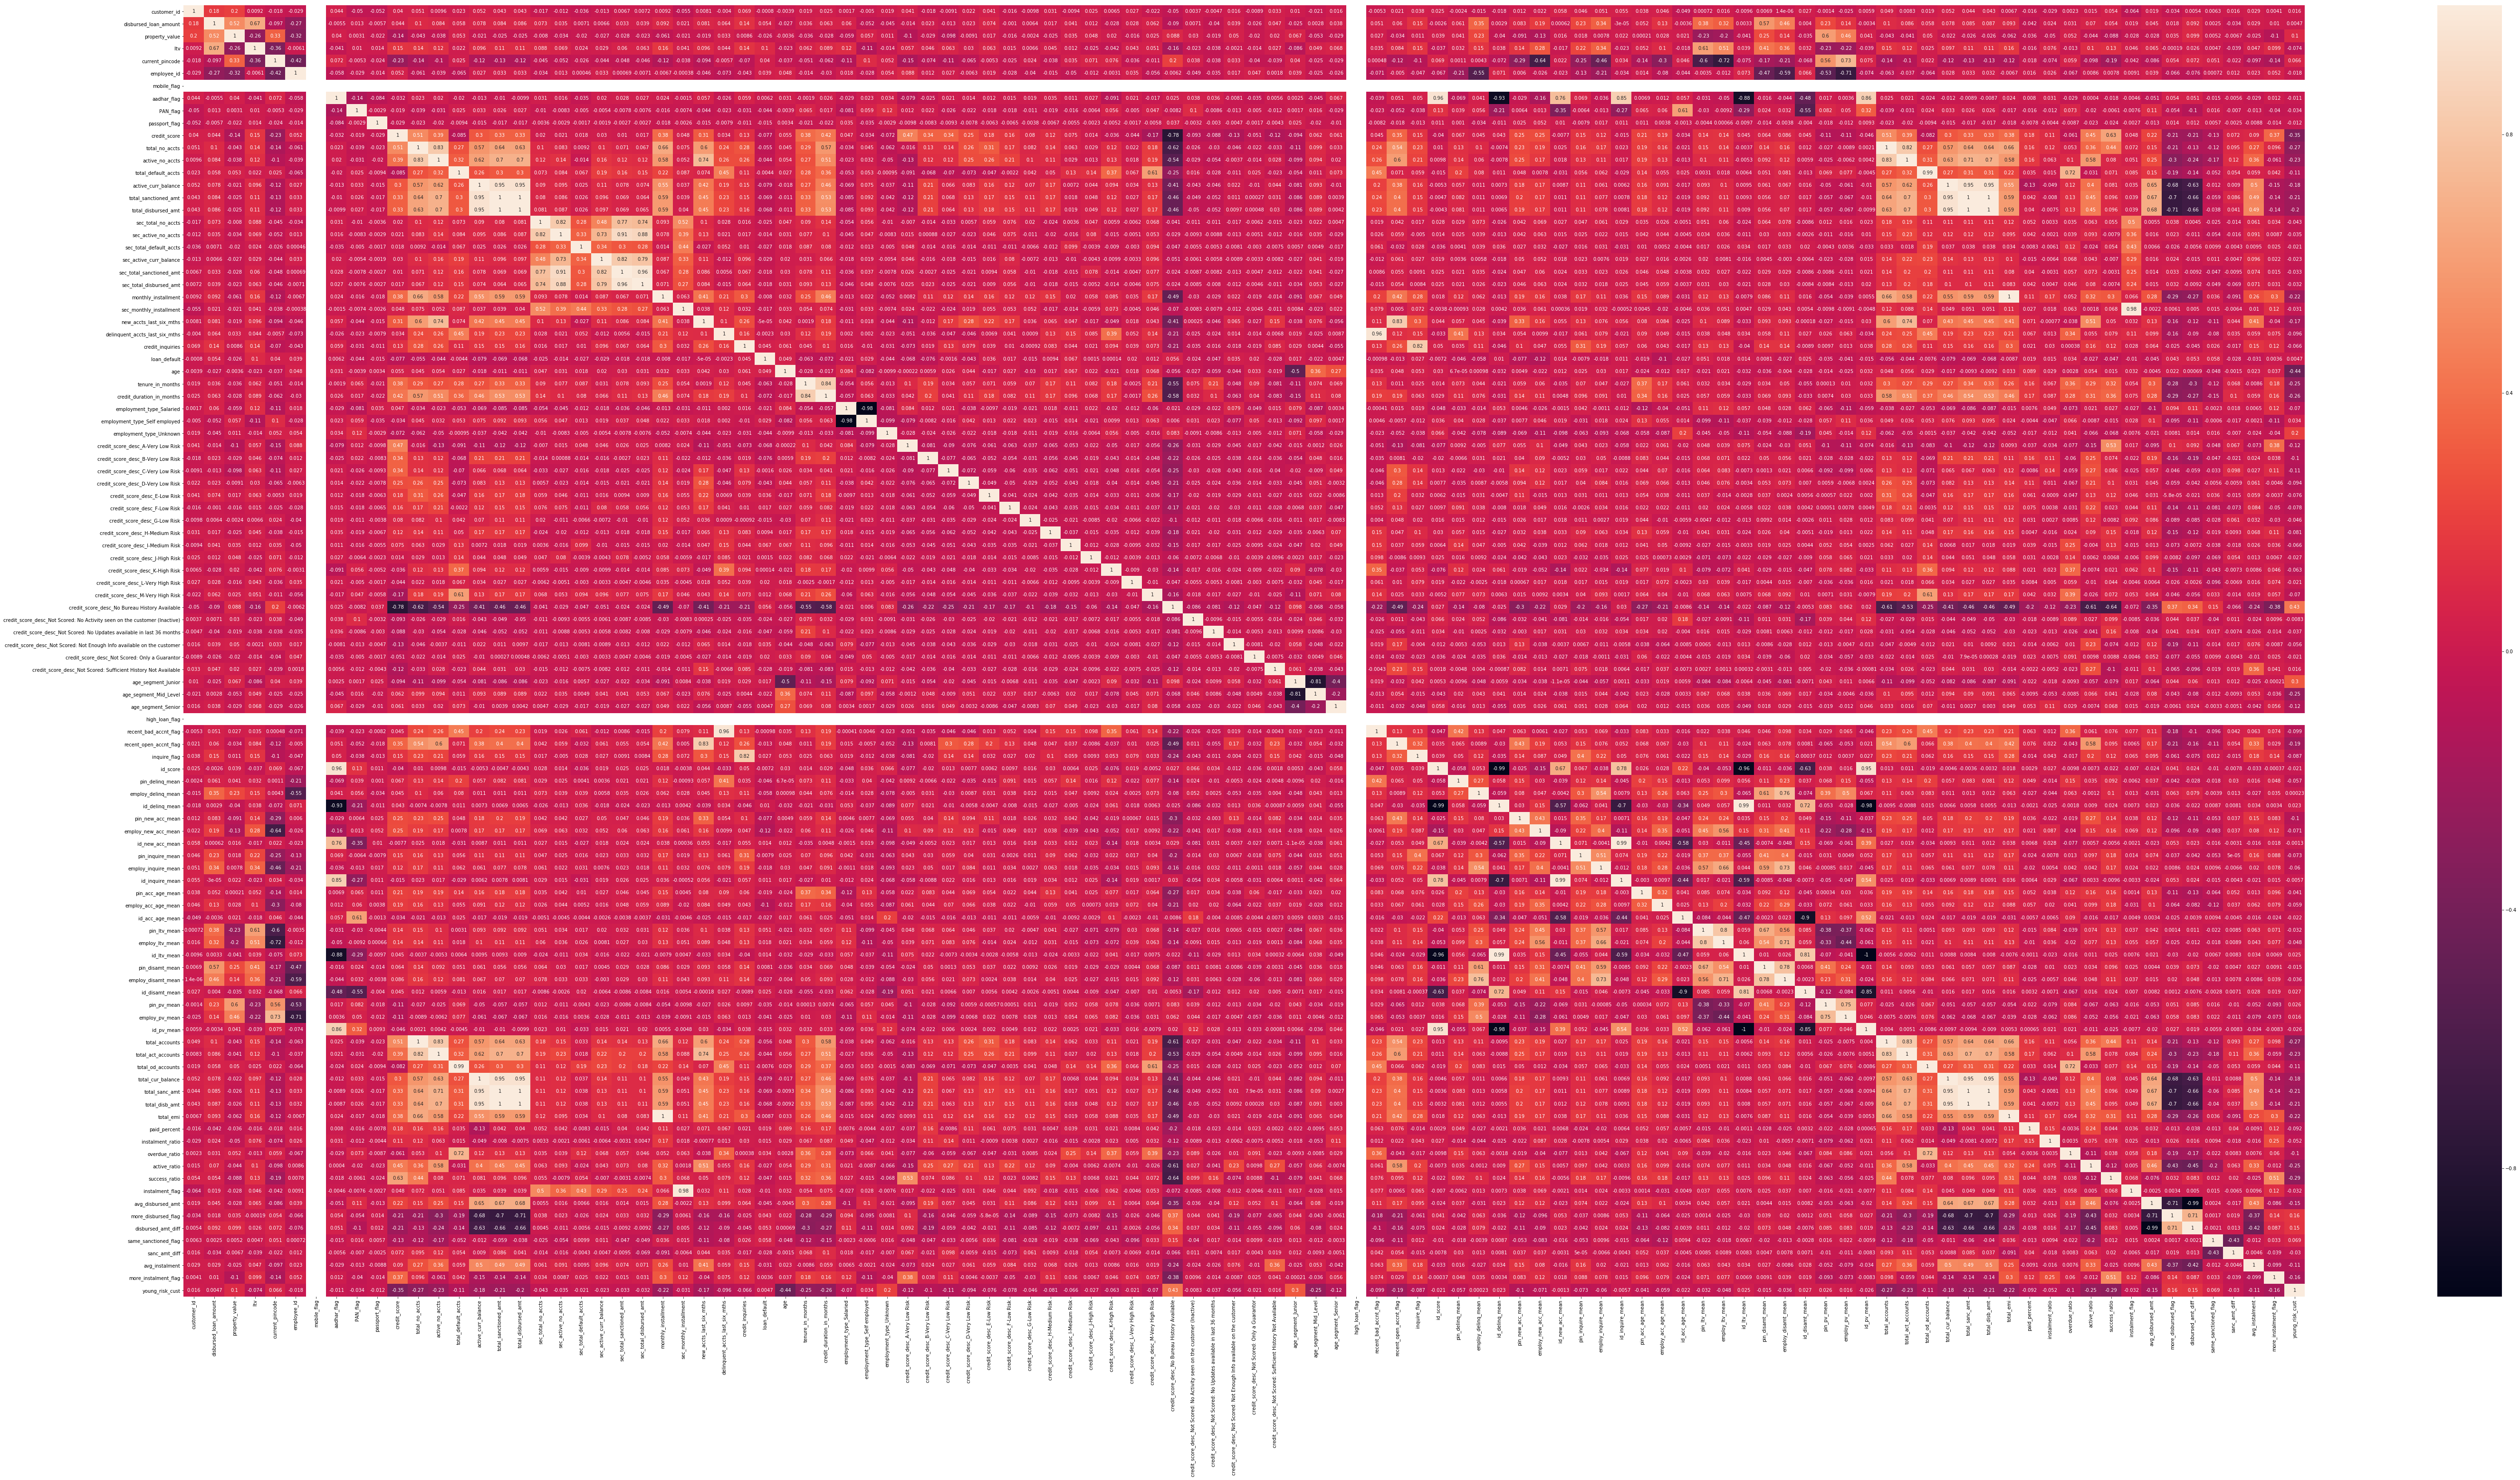

In [1997]:
# Looking at Correlations in all the features using heatmap graph

plt.figure(figsize = (100,50))        # Size of the figure
sns.heatmap(loan_default.corr(),annot = True)
plt.show()

In [1998]:
 #### Dropping highly correlated variables if any

In [1999]:
corr_matrix = X_train.corr().abs()
corr_matrix

customer_id  disbursed_loan_amount  property_value       ltv  current_pincode  employee_id  mobile_flag  aadhar_flag  PAN_flag  passport_flag  credit_score  total_no_accts  active_no_accts  total_default_accts  active_curr_balance  total_sanctioned_amt  total_disbursed_amt  sec_total_no_accts  sec_active_no_accts  sec_total_default_accts  sec_active_curr_balance  sec_total_sanctioned_amt  sec_total_disbursed_amt  monthly_installment  sec_monthly_installment  new_accts_last_six_mths  delinquent_accts_last_six_mths  credit_inquiries       age  tenure_in_months  credit_duration_in_months  employment_type_Salaried  employment_type_Self employed  employment_type_Unknown  credit_score_desc_A-Very Low Risk  credit_score_desc_B-Very Low Risk  credit_score_desc_C-Very Low Risk  credit_score_desc_D-Very Low Risk  credit_score_desc_E-Low Risk  credit_score_desc_F-Low Risk  credit_score_desc_G-Low Risk  credit_score_desc_H-Medium Risk  \
customer_id                                            1.000000               0.173654        0.223810  0.028250         0.004116     0.062286          NaN     0.039944  0.040298            NaN      0.003271        0.034516         0.010275             0.050911             0.082361              0.075784             0.074292            0.009796             0.014131                 0.043228                 0.051855                  0.006095                 0.006257             0.001526                 0.049024                 0.000461                        0.021789          0.089965  0.017305          0.005115                   0.013292                  0.024241                       0.020085                 0.020383                           0.011976                           0.049067                           0.000615                           0.011636                      0.003191                      0.019931                      0.047770                         0.019625   
disbursed_loan_amount                                  0.173654               1.000000        0.521867  0.651051         0.109292     0.299478          NaN     0.021527  0.018754            NaN      0.044699        0.104054         0.091452             0.036714             0.087522              0.095655             0.097398            0.061228             0.031015                 0.007405                 0.014802                  0.021648                 0.030267             0.071038                 0.010478                 0.095693                        0.028978          0.157507  0.017541          0.023570                   0.036173                  0.045618                       0.033885                 0.057824                           0.027039                           0.018551                           0.000163                           0.008305                      0.108197                      0.017313                      0.020627                         0.017945   
property_value                                         0.223810               0.521867        1.000000  0.280111         0.344855     0.331999          NaN     0.032693  0.019193            NaN      0.158969        0.059657         0.053908             0.049001             0.018978              0.028236             0.028411            0.015262             0.028703                 0.023998                 0.033068                  0.022729                 0.018641             0.077157                 0.032684                 0.040548                        0.009036          0.027419  0.023804          0.040484                   0.048241                  0.078750                       0.074171                 0.021793                           0.098993                           0.030399                           0.100835                           0.031737                      0.011799                      0.048410                      0.008092                         0.015609   
ltv                                                    0.028250               0.6510

In [2000]:
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

In [2001]:
# Find index of feature columns with correlation greater than 0.90

to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]

In [2002]:
to_drop

['total_sanctioned_amt',
 'total_disbursed_amt',
 'sec_total_sanctioned_amt',
 'sec_total_disbursed_amt',
 'employment_type_Self employed']

In [2003]:
X_test = X_test.drop(['total_sanctioned_amt','total_disbursed_amt','sec_total_sanctioned_amt','sec_total_disbursed_amt'],1)
X_train = X_train.drop(['total_sanctioned_amt','total_disbursed_amt','sec_total_sanctioned_amt','sec_total_disbursed_amt'],1)
